<a href="https://colab.research.google.com/github/ElhamKazemihojat/Cousre-6220/blob/main/Course6220_ElhamKazemihojat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plots

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import roc_curve, auc
import shap
from scipy.cluster.hierarchy import linkage, leaves_list

# Ensure plots are shown interactively
plt.ion()

# Global constants
DATA_URL ="https://raw.githubusercontent.com/ElhamKazemihojat/Cousre-6220/Datasets/Original-Dataset.csv"

# Function to load data
def load_data(url):
    return pd.read_csv(url)

# Function to standardize data
def standardize_data(X):
    return StandardScaler().fit_transform(X)

# Function to apply PCA
def apply_pca(X, n_components=None):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X), pca
def apply_pca2(X, n_components=2):
    pca2 = PCA(n_components=n_components)
    return pca2.fit_transform(X), pca2

def display_explained_variance(pca):
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    return explained_variance, cumulative_variance

def plot_boxplots(X_scaled_df, figsize=(12, 8)):
    plt.figure(figsize=figsize)
    sns.boxplot(data=X_scaled_df)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
def plot_correlation_matrix(df, figsize=(10, 8), cmap='coolwarm'):
        corr = df.corr()
        plt.figure(figsize=figsize)
        sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})
        plt.show()
def plot_scree_plot(pca_instance):
    explained_variance = pca_instance.explained_variance_ratio_
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), color="blue", marker='o')
    for i, v in enumerate(np.cumsum(explained_variance)):
        plt.text(i + 1, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Scree Plot')
    plt.grid(True)
    plt.show()

def plot_pareto_plot(pca_instance):
    explained_variance = pca_instance.explained_variance_ratio_
    plt.figure(figsize=(10, 5))
    bars = plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', color="green", label='Individual explained variance')
    steps = plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid', color="red", label='Cumulative explained variance')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}", ha='center', va='bottom')
    for i, value in enumerate(np.cumsum(explained_variance)):
        plt.text(i + 1, value, f"{value:.2f}", ha='center', va='bottom')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.title('Pareto Plot')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


def plot_pairplot(df, hue, figsize=(15, 15), palette="Dark2"):
        # Select all columns except the specified 'hue' column
        columns_to_plot = df.columns.drop(hue)
        # Create a pairplot with KDEs on the diagonal and use the 'hue' column as the hue
        pair_plot = sns.pairplot(df, vars=columns_to_plot, hue=hue, diag_kind='kde', palette=palette)
        # Increase figure size to make room for axis labels
        pair_plot.fig.set_size_inches(*figsize)
        # Adjust layout to fit the figure area and prevent label overlap
        plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.2, wspace=0.2)
        plt.show()

def plot_biplot(pca_result, pca_instance, y, labels, figsize=(14, 10)):
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    plt.figure(figsize=figsize)
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='summer')
    for i, feature in enumerate(labels[:-1]):
        plt.arrow(0, 0, pca_instance.components_[0, i], pca_instance.components_[1, i], color='r', alpha=0.5)
        plt.text(pca_instance.components_[0, i] * 1.2, pca_instance.components_[1, i] * 1.2, feature, color='black', ha='center', va='center')
    plt.legend(handles=scatter.legend_elements()[0], labels=['Non-diabetic', 'Diabetic'])
    explained_variance_ratio = pca_instance.explained_variance_ratio_
    plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.2%} explained variance)')
    plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.2%} explained variance)')
    plt.grid(True)
    plt.show()
def Coefficient_Plot(pca, X_columns):
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    plt.figure(figsize=(8, 6))
    plt.scatter(loadings[:, 0], loadings[:, 1], color='Green')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
    for i, txt in enumerate(X_columns):
        plt.annotate(txt, (loadings[i, 0], loadings[i, 1]), textcoords="offset points", xytext=(5,5), ha='center')
    plt.show()

# Function for plotting decision boundaries
def plot_decision_boundaries(X, y, classifier_dict, pca, h=0.01):  # Use a finer resolution
    plt.figure(figsize=(15, 5))
    for i, (name, clf) in enumerate(classifier_dict.items(), 1):
        plt.subplot(1, 3, i)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4, cmap='terrain')
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='magma', edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(name)
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
        plt.gca().add_artist(legend1)
    plt.tight_layout()
    plt.show()


# Function to plot confusion matrices
def plot_confusion_matrices(X_test, y_test, classifier_dict):
    plt.figure(figsize=(15, 5))
    for i, (name, clf) in enumerate(classifier_dict.items(), 1):
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        cm_max = cm.max()  # Find the max value for scaling
        cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
        plt.subplot(1, len(classifier_dict), i)
        sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', vmin=0, vmax=cm_max)  # Set the color scale
        plt.title(f'Confusion Matrix: {name}')
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Define classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Ada Boost Classifier': AdaBoostClassifier(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis()
}


# Fit the models with the PCA-transformed data and evaluate
def train_and_evaluate(X_train, y_train, X_test, y_test, classifiers):
    results_list_pca = []

    # Training each classifier
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Calculate precision, recall, and F1 score
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        results_list_pca.append({
            'Model': name,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })
    # Plot decision boundaries
    plot_decision_boundaries(X_train, y_train, classifiers, pca)
    # Plot confusion matrices
    plot_confusion_matrices(X_test, y_test, classifiers)
    return results_list_pca


def plot_individual_roc_curves(X_test, y_test, classifiers):
    y_true_aggregate = np.array([])
    y_scores_aggregate = np.array([])
    aucs = []

    # Collect aggregate scores for micro-average ROC calculation
    for name, clf in classifiers.items():
        y_score = clf.predict_proba(X_test)[:, 1]
        y_true_aggregate = np.append(y_true_aggregate, y_test)
        y_scores_aggregate = np.append(y_scores_aggregate, y_score)
        aucs.append(auc(*roc_curve(y_test, y_score)[:2]))

    # Calculate micro-average ROC
    fpr_micro, tpr_micro, _ = roc_curve(y_true_aggregate, y_scores_aggregate)
    roc_auc_micro = auc(fpr_micro, tpr_micro)

    # Calculate macro-average ROC
    roc_auc_macro = np.mean(aucs)

    # Plot ROC curves for each classifier
    for name, clf in classifiers.items():
        plt.figure(figsize=(8, 8))
        y_score = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        # Plot class 1
        plt.plot(fpr, tpr, label=f'Class 1 ROC (AUC = {roc_auc:.2f})', color='blue', lw=2)

        # Plot class 0
        plt.plot(1 - fpr, 1 - tpr, label=f'Class 0 ROC (AUC = {1 - roc_auc:.2f})', color='green', lw=2)

        # Plot micro-average ROC on each plot
        plt.plot(fpr_micro, tpr_micro, color='red', lw=2, label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})')

        # Plot macro-average ROC as a line
        plt.plot(fpr, tpr, color='yellow', linestyle='--', lw=2, label=f'Macro-average ROC (AUC = {roc_auc_macro:.2f})')

        # Macro-average AUC displayed in plot legend
        plt.title(f'{name} - ROC Curves')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--', label='Chance level')
        plt.show()

def main():
    data = load_data(DATA_URL)
    X = data.drop('Outcome', axis=1).values
    y = data['Outcome'].values
    X_scaled = standardize_data(X)
    pca = PCA(n_components=2)
    X_scaled_pca = pca.fit_transform(X_scaled)

    # Use all components or a specific number
    X_pca, pca_instance = apply_pca(X_scaled, n_components=None)  # or n_components=2

    pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i + 1}' for i in range(pca_instance.n_components_)])

    # Plotting boxplots
    X_scaled_df = pd.DataFrame(X_scaled, columns=data.drop('Outcome', axis=1).columns)
    plot_boxplots(X_scaled_df)

    # Plot correlation matrix
    plot_correlation_matrix(data.drop('Outcome', axis=1))

    # Plot pair plot
    plot_pairplot(data, 'Outcome')

    plot_scree_plot(pca_instance)
    plot_pareto_plot(pca_instance)

    X_pca, pca_all = apply_pca(X_scaled, n_components=None)
    plot_biplot(X_pca[:, :2], pca_all, y, data.columns[:-1])  # Assuming biplot needs the first two PCs only

    _, pca_for_Coefficient = apply_pca(X_scaled, n_components=2)
    Coefficient_Plot(pca_for_Coefficient, data.columns[:-1])

    X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, y, test_size=0.3, random_state=42)

    # Fit the models with the PCA-transformed data
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)

    plot_decision_boundaries(X_train, y_train, classifiers, pca)

    # Plot confusion matrices using the test set
    plot_confusion_matrices(X_test, y_test, classifiers)


    # Fit the models with the PCA-transformed data
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)

    # Here you can add the plot_individual_roc_curves function call
    plot_individual_roc_curves(X_test, y_test, classifiers)


if __name__ == "__main__":
            main()

# SHAP Library

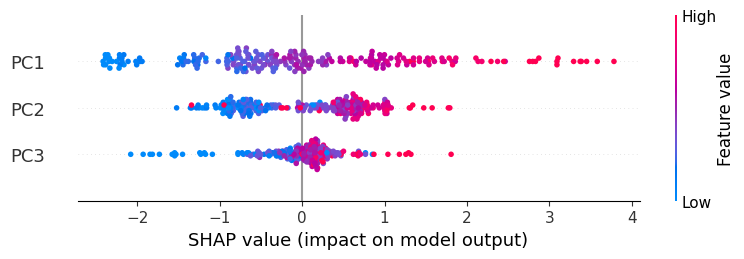

/usr/local/lib/python3.10/dist-packages/shap/plots/_force_matplotlib.py:101: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


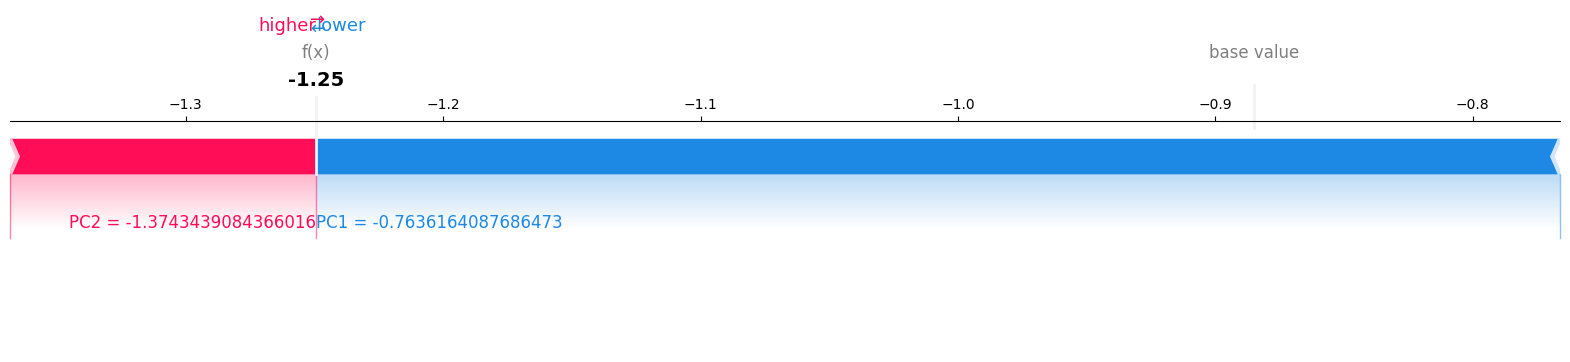

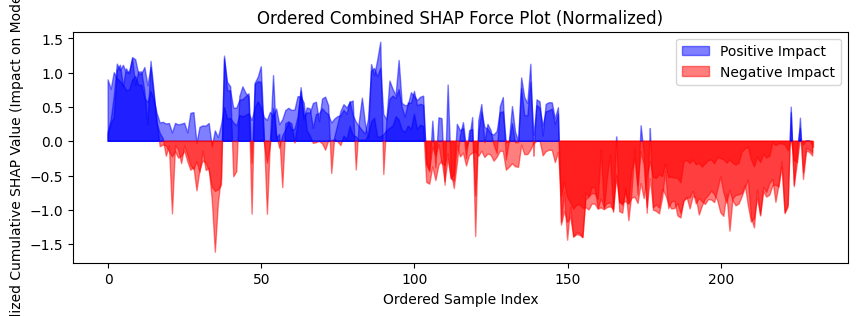

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
import shap
from scipy.cluster.hierarchy import linkage, leaves_list

def load_and_preprocess_data(url):
    """Load data from a URL and preprocess it by scaling features."""
    data = pd.read_csv(url)
    X = data.drop('Outcome', axis=1).values
    y = data['Outcome'].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y, data  # Return data DataFrame as well

def apply_pca(X, n_components=3):
    """Apply PCA to reduce dimensions of data for better visualization and model performance."""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return X_pca, pca

def train_model(X_train, y_train, n_estimators=100, random_state=42):
    """Train a Gradient Boosting classifier on the training data."""
    model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=random_state)
    model.fit(X_train, y_train)
    return model

def compute_shap_values(model, X, explainer_type=shap.TreeExplainer):
    """Compute SHAP values using the model and test features."""
    explainer = explainer_type(model)
    shap_values = explainer.shap_values(X)
    return shap_values, explainer

def plot_shap_summary(shap_values, X, feature_names):
    """Plot SHAP summary plot directly in the notebook."""
    shap.summary_plot(shap_values, X, feature_names=feature_names)

def create_force_plot(explainer, shap_values, X_instance, feature_names):
    """Create and save a SHAP force plot for a specific test instance."""
    expected_value = explainer.expected_value
    if isinstance(expected_value, list):
        expected_value = expected_value[1]  # Assuming interest in the positive class

    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Assuming interest in the positive class

    force_plot = shap.force_plot(expected_value, shap_values, features=X_instance, feature_names=feature_names, matplotlib=True)
    plt.savefig('force_plot.png')  # Save the plot as a PNG file
    plt.close()

# Main execution block
if __name__ == "__main__":
    url = "https://raw.githubusercontent.com/ElhamKazemihojat/Cousre-6220/Datasets/Original-Dataset.csv"
    X_scaled, y, data = load_and_preprocess_data(url)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    X_train_pca, pca = apply_pca(X_train, n_components=3)
    X_test_pca = pca.transform(X_test)
    model = train_model(X_train_pca, y_train)
    shap_values, explainer = compute_shap_values(model, X_test_pca)
    feature_names = [f'PC{i+1}' for i in range(X_test_pca.shape[1])]
    plot_shap_summary(shap_values, X_test_pca, feature_names=feature_names)

    X_train_pca2, pca2 = apply_pca(X_train, n_components=2)  # Using 2 components for the force plot visualization
    X_test_pca2 = pca2.transform(X_test)
    model2 = train_model(X_train_pca2, y_train)
    shap_values2, explainer2 = compute_shap_values(model2, X_test_pca2)
    feature_names2 = ['PC1', 'PC2']

    # Example of plotting a force plot for the first test instance
    observation_index = 23  # Change this index to choose a different observation
    single_observation = X_test_pca2[observation_index]
    shap_values_single = explainer2.shap_values(single_observation)

    # Create and save force plot
    create_force_plot(explainer2, shap_values_single, single_observation, feature_names2)



    # Use absolute values of SHAP values for clustering to avoid negative distances
    absolute_shap_values = np.abs(shap_values[1])


# Handling binary classification focus on the positive class
if isinstance(shap_values2, list):
    shap_values2 = shap_values2[1]

# Hierarchical clustering of SHAP values to order by similarity
Z = linkage(shap_values2, 'ward')
sorted_idx = leaves_list(Z)

# Reorder SHAP values
shap_values_sorted = shap_values[sorted_idx]

# Normalize SHAP values separately for positive and negative
max_pos_shap = np.max(shap_values_sorted, axis=0)
max_neg_shap = np.min(shap_values_sorted, axis=0)
normalized_pos_shap = np.clip(shap_values_sorted / max_pos_shap, 0, 1)
normalized_neg_shap = np.clip(shap_values_sorted / -max_neg_shap, -1, 0)

# Combined normalized SHAP values, ensuring negative values do not exceed zero
normalized_shap_values = np.where(shap_values_sorted > 0, normalized_pos_shap, normalized_neg_shap)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 3))
base_shap = np.zeros(normalized_shap_values.shape[0])

# Calculate and plot cumulative normalized SHAP values
cumulative_shap = np.cumsum(normalized_shap_values, axis=1)

for i in range(normalized_shap_values.shape[1]):
    ax.fill_between(range(len(normalized_shap_values)), base_shap, cumulative_shap[:, i],
                    where=cumulative_shap[:, i] >= base_shap, color='blue', alpha=0.5, interpolate=True,
                    label='Positive Impact' if i == 0 else None)
    ax.fill_between(range(len(normalized_shap_values)), base_shap, cumulative_shap[:, i],
                    where=cumulative_shap[:, i] <= base_shap, color='red', alpha=0.5, interpolate=True,
                    label='Negative Impact' if i == 0 else None)

ax.set_xlabel('Ordered Sample Index')
ax.set_ylabel('Normalized Cumulative SHAP Value (Impact on Model Output)')
plt.title('Ordered Combined SHAP Force Plot (Normalized)')

# Add legend
ax.legend()

plt.show()

# Comparison Tables

In [39]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score,
                             recall_score, f1_score, cohen_kappa_score, matthews_corrcoef)
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
# Load  dataset
url = "https://raw.githubusercontent.com/ElhamKazemihojat/Cousre-6220/Datasets/Original-Dataset.csv"
data = pd.read_csv(url)
# Define X and y
X = data.drop('Outcome', axis=1)
y = data['Outcome']
results_list = []
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Initialize classifiers
classifiers = {
    'Dummy': DummyClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Ada Boost Classifier': AdaBoostClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'SVM - Linear Kernel': SVC(kernel='linear', probability=True)
}

# Initialize DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC', 'Recall', 'Precision', 'F1', 'Kappa', 'MCC', 'TT (Sec)'])
# Train and evaluate models
for name, clf in classifiers.items():
    start_time = time()
    clf.fit(X_train, y_train)
    end_time = time()
    training_time = end_time - start_time
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else y_pred
    results_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'Kappa': cohen_kappa_score(y_test, y_pred),
        'MCC': matthews_corrcoef(y_test, y_pred),
        'TT (Sec)': training_time
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Use maximum width available
pd.set_option('display.max_colwidth', None) # Display full width of each column
pd.set_option('display.max_rows', None)
# Display the results table
print(results_df)
# Step 1: Import PCA
from sklearn.decomposition import PCA
# Step 2: Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 3: Update the Classifier Loop
results_list_pca = []
for name, clf in classifiers.items():
    start_time = time()
    clf.fit(X_train_pca, y_train)  # Use PCA-transformed data
    end_time = time()
    training_time = end_time - start_time
    y_pred = clf.predict(X_test_pca)  # Use PCA-transformed data
    y_proba = clf.predict_proba(X_test_pca)[:, 1] if hasattr(clf, "predict_proba") else y_pred

    results_list_pca.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'Kappa': cohen_kappa_score(y_test, y_pred),
        'MCC': matthews_corrcoef(y_test, y_pred),
        'TT (Sec)': training_time
    })

# Step 4: Convert list of dictionaries to a DataFrame and display
results_df_pca = pd.DataFrame(results_list_pca)
print(results_df_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                              Model  Accuracy       AUC  Recall  Precision        F1     Kappa  \
0                             Dummy  0.653680  0.500000  0.0000   0.000000  0.000000  0.000000   
1               Logistic Regression  0.740260  0.800248  0.6250   0.625000  0.625000  0.426325   
2                     Decision Tree  0.688312  0.685182  0.6750   0.540000  0.600000  0.349805   
3      Linear Discriminant Analysis  0.731602  0.797268  0.6125   0.612500  0.612500  0.407202   
4   Quadratic Discriminant Analysis  0.766234  0.798427  0.6875   0.654762  0.670732  0.489691   
5            Extra Trees Classifier  0.722944  0.782326  0.5625   0.608108  0.584416  0.377096   
6      Gradient Boosting Classifier  0.748918  0.795199  0.6625   0.630952  0.646341  0.451890   
7          Random Forest Classifier  0.753247  0.808278  0.6375   0.645570  0.641509  0.453402   
8              Ada Boost Classifier  0.744589  0.755174  0.6250   0.632911  0.628931  0.434223   
9                  R

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                              Model  Accuracy       AUC  Recall  Precision        F1     Kappa  \
0                             Dummy  0.653680  0.500000  0.0000   0.000000  0.000000  0.000000   
1               Logistic Regression  0.714286  0.761093  0.4875   0.609375  0.541667  0.337821   
2                     Decision Tree  0.670996  0.645488  0.5625   0.523256  0.542169  0.285935   
3      Linear Discriminant Analysis  0.718615  0.760844  0.4875   0.619048  0.545455  0.345837   
4   Quadratic Discriminant Analysis  0.727273  0.755877  0.5000   0.634921  0.559441  0.365965   
5            Extra Trees Classifier  0.666667  0.685224  0.4875   0.520000  0.503226  0.252804   
6      Gradient Boosting Classifier  0.709957  0.733982  0.4875   0.600000  0.537931  0.329855   
7          Random Forest Classifier  0.679654  0.695323  0.5000   0.540541  0.519481  0.279767   
8              Ada Boost Classifier  0.735931  0.753684  0.4625   0.672727  0.548148  0.370516   
9                  R

# EigenVectots & EigenValus

In [37]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np


def pca_with_sklearn(url):
    # Load the dataset
    data = pd.read_csv(url)

    X = data.drop(columns=['Outcome'])  # drop the target column if named 'Outcome'

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA()
    pca.fit(X_scaled)

    # Eigenvalues and Eigenvectors
    eigenvalues = pca.explained_variance_
    eigenvectors = pca.components_

    # Round the eigenvalues and eigenvectors to three decimal places
    eigenvalues_rounded = np.round(eigenvalues, 3)
    eigenvectors_rounded = np.round(eigenvectors, 3)

    return eigenvalues_rounded, eigenvectors_rounded


# Usage with your dataset
eigenvalues, eigenvectors = pca_with_sklearn("https://raw.githubusercontent.com/ElhamKazemihojat/Cousre-6220/Datasets/Original-Dataset.csv")

# Printing the results
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[2.097 1.733 1.031 0.877 0.763 0.684 0.42  0.405]

Eigenvectors:
[[ 0.128  0.393  0.36   0.44   0.435  0.452  0.271  0.198]
 [ 0.594  0.174  0.184 -0.332 -0.251 -0.101 -0.122  0.621]
 [-0.013  0.468 -0.535 -0.238  0.337 -0.362  0.433  0.075]
 [ 0.081 -0.404  0.056  0.038 -0.35   0.054  0.834  0.071]
 [-0.476  0.466  0.328 -0.488 -0.347  0.253  0.12  -0.109]
 [ 0.194  0.094 -0.634  0.01  -0.271  0.685 -0.086 -0.033]
 [-0.589 -0.06  -0.192  0.282 -0.132 -0.035 -0.086  0.712]
 [ 0.118  0.45  -0.011  0.566 -0.549 -0.342 -0.008 -0.212]]
